In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
% matplotlib inline

In [3]:
df=pd.read_csv("Data.csv")

In [60]:
df

,tablename,statecode,distcode,areaname,tru,age,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
0,HH06,7,0,State - DELHI (07),t,All Ages,2582507,145587,99202,8002,2313417,59209,167009,74506,2879,3870,0,0
1,HH06,7,0,State - DELHI (07),t,Less than 20,20449,2390,16074,1908,4142,309,224,164,9,9,0,0
2,HH06,7,0,State - DELHI (07),t,20-29,348270,10092,61948,2505,284391,6075,1596,1188,335,324,0,0
3,HH06,7,0,State - DELHI (07),t,30-39,774453,23523,11945,1103,745971,15991,15681,5161,856,1268,0,0
4,HH06,7,0,State - DELHI (07),t,40-49,692959,29199,3743,985,652403,16273,35992,10622,821,1319,0,0
5,HH06,7,0,State - DELHI (07),t,50-59,405498,27382,2053,731,362103,10446,40841,15603,501,602,0,0
6,HH06,7,0,State - DELHI (07),t,60-69,224421,26122,1236,468,179081,6767,43866,18618,238,269,0,0
7,HH06,7,0,State - DELHI (07),t,70-79,89744,18250,650,189,67375,2488,21632,15516,87,57,0,0
8,HH06,7,0,State - DELHI (07),t,80+,4049,345,1327,74,2586,167,130,101,6,3,0,0
9,HH06,7,0,State - DELHI (07),t,Age Not Stated,22664,8284,226,39,15365,693,7047,7533,26,19,0,0


In [5]:
df.rename(columns={"Table Name":"tablename","State Code":"statecode","District Code":"distcode","Area Name":"areaname","Total/ Rural/Urban":"tru","Age (in years)":"age","Total - Male":"totalm","Total - Female":"totalf","PSUs - Male":"psum","PSUs - Female":"psuf","Private - Male":"pvtm","Private - Female":"pvtf","Business owners - Male":"bsm","Business owners - Female":"bsf","Zero income - Male":"0m","Zero income - Female":"0f","Other kind of employment - Male":"otherm","Other kind of employment- Female":"otherf"},inplace=True)

In [6]:
df.tru=df.tru.map({"TOTAL":"t","Total":"t","Urban":"u","URBAN":"u","Rural":"r","RURAL":"r"})

In [7]:
df.pivot_table(index=["statecode"])

,0f,0m,bsf,bsm,distcode,otherf,otherm,psuf,psum,pvtf,pvtm,totalf,totalm
statecode,,,,,,,,,,,,,
7,103.200000,76.773333,1986.826667,4453.573333,4.500000,0.000000,0.00000,213.386667,2645.386667,1578.906667,61691.120000,3882.320000,68866.853333
19,1131.691228,522.385965,4634.273684,17375.929825,9.000000,0.000000,0.00000,822.708772,5604.126316,4660.870175,187560.589474,11249.543860,211063.031579
27,622.970370,274.192593,3086.622222,10093.088889,17.500000,0.000000,0.00000,445.570370,3629.511111,3476.281481,122977.755556,7631.444444,136974.548148
29,456.200000,143.495238,2241.619048,9535.019048,13.500000,0.000000,0.00000,431.580952,2522.238095,3308.695238,80219.400000,6438.095238,92420.152381
33,357.367677,116.886869,1479.983838,6262.226263,619.979798,43.058586,18.59596,152.709091,466.729293,1636.896970,40566.076768,3670.016162,47430.515152


In [8]:
sat=df.groupby(["statecode",'areaname',"tru"])[['totalm', 'totalf',
       'psum', 'psuf', 'pvtm', 'pvtf', 'bsm', 'bsf', '0m', '0f', 'otherm',
       'otherf']].sum().reset_index()

In [9]:
sat_d=sat[sat.statecode==7]
sat_w=sat[sat.statecode==19]
sat_m=sat[sat.statecode==27]
sat_k=sat[sat.statecode==29]
sat_t=sat[sat.statecode==33]

In [10]:
sat_d_t=sat_d[sat_d.tru=="t"]

In [11]:
area_name=[]
for i in sat_d_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])
area_name
final=[]
for i in area_name:
    final.append(re.split(r'-\s', i)[1])
final

['Central',
 'East',
 'New Delhi',
 'North',
 'North East',
 'North West',
 'South',
 'South West',
 'West',
 'DELHI']

In [12]:
sat_d_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
sat_d_t.drop(["otherm","otherf"],axis=1,inplace=True)


C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
sat_w_t=sat_w[sat_w.tru=="t"]
sat_w_t.areaname

31                        District - Bankura  (13)
34                     District - Barddhaman  (09)
37                        District - Birbhum  (08)
40             District - Dakshin Dinajpur *  (05)
43                      District - Darjiling  (01)
46                          District - Haora  (16)
49                          District - Hugli  (12)
52                     District - Jalpaiguri  (02)
55                     District - Koch Bihar  (03)
58                        District - Kolkata  (17)
61                         District - Maldah  (06)
64                      District - Medinipur  (15)
67                    District - Murshidabad  (07)
70                          District - Nadia  (10)
73     District - North Twenty Four Parganas  (11)
76                       District - Puruliya  (14)
79    District - South  Twenty Four Parganas  (18)
82                 District - Uttar Dinajpur  (04)
85                       State - WEST BENGAL  (19)
Name: areaname, dtype: object

In [15]:
area_name=[]
for i in sat_w_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])
area_name
wb_area=[]
for i in area_name:
    wb_area.append(re.split(r'\*', i)[0])
wb_area

['District - Bankura',
 'District - Barddhaman',
 'District - Birbhum',
 'District - Dakshin Dinajpur ',
 'District - Darjiling',
 'District - Haora',
 'District - Hugli',
 'District - Jalpaiguri',
 'District - Koch Bihar',
 'District - Kolkata',
 'District - Maldah',
 'District - Medinipur',
 'District - Murshidabad',
 'District - Nadia',
 'District - North Twenty Four Parganas',
 'District - Puruliya',
 'District - South',
 'District - Uttar Dinajpur',
 'State - WEST BENGAL']

In [61]:
final=[]
for i in wb_area:
    final.append(re.split(r'-\s', i)[1])
final

['Bankura',
 'Barddhaman',
 'Birbhum',
 'Dakshin Dinajpur ',
 'Darjiling',
 'Haora',
 'Hugli',
 'Jalpaiguri',
 'Koch Bihar',
 'Kolkata',
 'Maldah',
 'Medinipur',
 'Murshidabad',
 'Nadia',
 'North Twenty Four Parganas',
 'Puruliya',
 'South',
 'Uttar Dinajpur',
 'WEST BENGAL']

In [17]:
sat_w_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
sat_w_t

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
31,19,Bankura,t,1154588,56132,32140,3962,1029068,15696,90990,30574,2390,5900,0,0
34,19,Barddhaman,t,2642324,132648,66834,9392,2358982,54252,210516,55832,5992,13172,0,0
37,19,Birbhum,t,1139532,55924,22316,2828,1017348,17490,96540,27682,3328,7924,0,0
40,19,Dakshin Dinajpur,t,608704,26624,14328,1162,544050,9858,48392,11782,1934,3822,0,0
43,19,Darjiling,t,573798,60148,20604,5948,496272,25032,53098,24986,3824,4182,0,0
46,19,Haora,t,1592082,80894,49670,6544,1388380,35872,150450,32362,3582,6116,0,0
49,19,Hugli,t,1986362,98472,55816,8216,1744922,41636,180898,37894,4726,10726,0,0
52,19,Jalpaiguri,t,1268970,104630,39820,6734,1112526,47104,111308,42558,5316,8234,0,0
55,19,Koch Bihar,t,985988,48714,24992,1846,872302,19264,86130,21918,2564,5686,0,0
58,19,Kolkata,t,1704624,139900,79766,17494,1424782,61964,196064,53556,4012,6886,0,0


In [19]:
sat_m

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
87,27,District - Ahmadnagar (26),r,1177388,61112,18048,2752,1092732,26044,64232,23962,2376,8354,0,0
88,27,District - Ahmadnagar (26),t,1473292,76132,25138,3934,1358556,32384,86678,29442,2920,10372,0,0
89,27,District - Ahmadnagar (26),u,295904,15020,7090,1182,265824,6340,22446,5480,544,2018,0,0
90,27,District - Akola (05),r,393600,17498,8048,470,360624,5282,23408,9292,1520,2454,0,0
91,27,District - Akola (05),t,610782,28052,14244,1138,556562,8910,37796,14350,2180,3654,0,0
92,27,District - Akola (05),u,217182,10554,6196,668,195938,3628,14388,5058,660,1200,0,0
93,27,District - Amravati (07),r,676736,35960,14462,1250,616390,11012,43370,19356,2514,4342,0,0
94,27,District - Amravati (07),t,998024,52262,23760,2480,904802,15990,66200,27998,3262,5794,0,0
95,27,District - Amravati (07),u,321288,16302,9298,1230,288412,4978,22830,8642,748,1452,0,0
96,27,District - Aurangabad (19),r,660334,27784,13638,1276,606526,10726,38958,12496,1212,3286,0,0


In [23]:
sat_m_t=sat_m[sat_m.tru=="t"]
sat_m_t.areaname[91]

'District - Akola  (05)'

In [24]:
area_name=[]
for i in sat_m_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])
area_name


['District - Ahmadnagar',
 'District - Akola',
 'District - Amravati',
 'District - Aurangabad',
 'District - Bhandara',
 'District - Bid',
 'District - Buldana',
 'District - Chandrapur',
 'District - Dhule',
 'District - Gadchiroli',
 'District - Gondiya *',
 'District - Hingoli *',
 'District - Jalgaon',
 'District - Jalna',
 'District - Kolhapur',
 'District - Latur',
 'District - Mumbai',
 'District - Mumbai (Suburban) *',
 'District - Nagpur',
 'District - Nanded',
 'District - Nandurbar *',
 'District - Nashik',
 'District - Osmanabad',
 'District - Parbhani',
 'District - Pune',
 'District - Raigarh',
 'District - Ratnagiri',
 'District - Sangli',
 'District - Satara',
 'District - Sindhudurg',
 'District - Solapur',
 'District - Thane',
 'District - Wardha',
 'District - Washim *',
 'District - Yavatmal',
 'State - MAHARASHTRA']

In [25]:
n_area=[]
for i in area_name:
    n_area.append(re.split(r'\s\*', i)[0])
n_area


['District - Ahmadnagar',
 'District - Akola',
 'District - Amravati',
 'District - Aurangabad',
 'District - Bhandara',
 'District - Bid',
 'District - Buldana',
 'District - Chandrapur',
 'District - Dhule',
 'District - Gadchiroli',
 'District - Gondiya',
 'District - Hingoli',
 'District - Jalgaon',
 'District - Jalna',
 'District - Kolhapur',
 'District - Latur',
 'District - Mumbai',
 'District - Mumbai (Suburban)',
 'District - Nagpur',
 'District - Nanded',
 'District - Nandurbar',
 'District - Nashik',
 'District - Osmanabad',
 'District - Parbhani',
 'District - Pune',
 'District - Raigarh',
 'District - Ratnagiri',
 'District - Sangli',
 'District - Satara',
 'District - Sindhudurg',
 'District - Solapur',
 'District - Thane',
 'District - Wardha',
 'District - Washim',
 'District - Yavatmal',
 'State - MAHARASHTRA']

In [26]:
final=[]
for i in n_area:
    final.append(re.split(r'-\s', i)[1])
final

['Ahmadnagar',
 'Akola',
 'Amravati',
 'Aurangabad',
 'Bhandara',
 'Bid',
 'Buldana',
 'Chandrapur',
 'Dhule',
 'Gadchiroli',
 'Gondiya',
 'Hingoli',
 'Jalgaon',
 'Jalna',
 'Kolhapur',
 'Latur',
 'Mumbai',
 'Mumbai (Suburban)',
 'Nagpur',
 'Nanded',
 'Nandurbar',
 'Nashik',
 'Osmanabad',
 'Parbhani',
 'Pune',
 'Raigarh',
 'Ratnagiri',
 'Sangli',
 'Satara',
 'Sindhudurg',
 'Solapur',
 'Thane',
 'Wardha',
 'Washim',
 'Yavatmal',
 'MAHARASHTRA']

In [27]:
sat_m_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
sat_m_t

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
88,27,Ahmadnagar,t,1473292,76132,25138,3934,1358556,32384,86678,29442,2920,10372,0,0
91,27,Akola,t,610782,28052,14244,1138,556562,8910,37796,14350,2180,3654,0,0
94,27,Amravati,t,998024,52262,23760,2480,904802,15990,66200,27998,3262,5794,0,0
97,27,Aurangabad,t,1053900,43154,26994,2310,966994,18528,58226,17536,1686,4780,0,0
100,27,Bhandara,t,466302,22286,9350,1062,407990,6398,47706,12288,1256,2538,0,0
103,27,Bid,t,789040,39406,15646,2568,729662,15968,42278,16308,1454,4562,0,0
106,27,Buldana,t,850696,39152,16446,1504,779884,14562,51344,18268,3022,4818,0,0
109,27,Chandrapur,t,882162,41078,24148,2162,786564,13506,69024,19848,2426,5562,0,0
112,27,Dhule,t,618316,29032,10176,1296,557654,10886,49304,14292,1182,2558,0,0
115,27,Gadchiroli,t,395648,23824,11798,1544,352270,7138,30294,12282,1286,2860,0,0


In [29]:
sat_k_t=sat_k[sat_k.tru=="t"]
sat_k_t.areaname

196          District - Bagalkot *  (02)
199           District - Bangalore  (20)
202     District - Bangalore Rural  (21)
205             District - Belgaum  (01)
208             District - Bellary  (12)
211               District - Bidar  (05)
214             District - Bijapur  (03)
217     District - Chamarajanagar*  (27)
220         District - Chikmagalur  (17)
223         District - Chitradurga  (13)
226    District - Dakshina Kannada  (24)
229         District - Davanagere*  (14)
232             District - Dharwad  (09)
235             District - Gadag *  (08)
238            District - Gulbarga  (04)
241              District - Hassan  (23)
244            District - Haveri *  (11)
247              District - Kodagu  (25)
250               District - Kolar  (19)
253            District - Koppal *  (07)
256              District - Mandya  (22)
259              District - Mysore  (26)
262             District - Raichur  (06)
265             District - Shimoga  (15)
268             

In [30]:
area_name=[]
for i in sat_k_t.areaname:
    area_name.append(re.split(r'\s{2}', i)[0])
area_name

['District - Bagalkot *',
 'District - Bangalore',
 'District - Bangalore Rural',
 'District - Belgaum',
 'District - Bellary',
 'District - Bidar',
 'District - Bijapur',
 'District - Chamarajanagar*',
 'District - Chikmagalur',
 'District - Chitradurga',
 'District - Dakshina Kannada',
 'District - Davanagere*',
 'District - Dharwad',
 'District - Gadag *',
 'District - Gulbarga',
 'District - Hassan',
 'District - Haveri *',
 'District - Kodagu',
 'District - Kolar',
 'District - Koppal *',
 'District - Mandya',
 'District - Mysore',
 'District - Raichur',
 'District - Shimoga',
 'District - Tumkur',
 'District - Udupi *',
 'District - Uttara Kannada',
 'State - KARNATAKA']

In [35]:
n_area=[]
for i in area_name:
    n_area.append(re.split(r'\s\*', i)[0])
n_area
n_area1=[]
for i in n_area:
    n_area1.append(re.split(r'\*', i)[0])
n_area1

['District - Bagalkot',
 'District - Bangalore',
 'District - Bangalore Rural',
 'District - Belgaum',
 'District - Bellary',
 'District - Bidar',
 'District - Bijapur',
 'District - Chamarajanagar',
 'District - Chikmagalur',
 'District - Chitradurga',
 'District - Dakshina Kannada',
 'District - Davanagere',
 'District - Dharwad',
 'District - Gadag',
 'District - Gulbarga',
 'District - Hassan',
 'District - Haveri',
 'District - Kodagu',
 'District - Kolar',
 'District - Koppal',
 'District - Mandya',
 'District - Mysore',
 'District - Raichur',
 'District - Shimoga',
 'District - Tumkur',
 'District - Udupi',
 'District - Uttara Kannada',
 'State - KARNATAKA']

In [39]:
final=[]
for i in n_area1:
    final.append(re.split(r'-\s', i)[1])
final

['Bagalkot',
 'Bangalore',
 'Bangalore Rural',
 'Belgaum',
 'Bellary',
 'Bidar',
 'Bijapur',
 'Chamarajanagar',
 'Chikmagalur',
 'Chitradurga',
 'Dakshina Kannada',
 'Davanagere',
 'Dharwad',
 'Gadag',
 'Gulbarga',
 'Hassan',
 'Haveri',
 'Kodagu',
 'Kolar',
 'Koppal',
 'Mandya',
 'Mysore',
 'Raichur',
 'Shimoga',
 'Tumkur',
 'Udupi',
 'Uttara Kannada',
 'KARNATAKA']

In [40]:
sat_k_t["areaname"]=final

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
sat_t

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
279,33,Alandur (M),u,81592,4940,1556,338,72860,2024,6950,2102,164,398,62,78
280,33,Ambattur (M),u,226154,12290,3214,614,207062,5832,15476,4652,298,984,104,208
281,33,Ambur (M),u,47034,2806,420,154,40178,1156,6342,1142,64,302,30,52
282,33,Ariyalur,r,320988,30590,2236,630,272320,16280,45570,11680,778,1842,84,158
283,33,Ariyalur,t,360246,33658,2554,766,306142,17746,50582,12824,872,2150,96,172
284,33,Ariyalur,u,39258,3068,318,136,33822,1466,5012,1144,94,308,12,14
285,33,Avadi (M),u,165384,9566,2740,476,148282,4672,13992,3424,318,902,52,92
286,33,Chennai (M Corp.),u,2148856,142846,42660,10102,1898858,67190,202164,51500,4094,12046,1080,2008
287,33,Coimbatore,r,450746,32830,4704,1034,381762,9548,62138,16904,1976,5064,166,280
288,33,Coimbatore,t,1799436,112020,22228,5116,1566082,39350,204776,50286,5570,15818,780,1450


In [56]:
sat_t_t=sat_t[sat_t.tru=="t"]
sat_t_t

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f,otherm,otherf
283,33,Ariyalur,t,360246,33658,2554,766,306142,17746,50582,12824,872,2150,96,172
288,33,Coimbatore,t,1799436,112020,22228,5116,1566082,39350,204776,50286,5570,15818,780,1450
292,33,Cuddalore,t,1185398,81684,9616,2178,1024834,36640,148902,37328,1776,4982,270,556
296,33,Dharmapuri,t,704154,46748,5092,1504,615442,21188,81414,17252,1986,6326,220,478
299,33,Dindigul,t,1044394,75150,8164,3388,895970,25184,136704,37766,3118,7836,438,976
306,33,Kanniyakumari,t,873662,91342,8712,4510,739010,50884,123776,28580,1914,6696,250,672
310,33,Karur,t,535276,38266,5346,1072,445724,10714,81500,19774,2478,6224,228,482
313,33,Krishnagiri,t,834986,60074,10050,1866,729110,28780,93444,21614,2164,7320,218,494
319,33,Madurai,t,1485300,102066,11692,4498,1281328,41996,188198,44324,3290,9382,792,1866
323,33,Nagapattinam,t,753272,73132,6600,2118,622742,38230,122132,27396,1564,4750,234,638


In [ ]:
for x in sat_d_t['areaname'].unique():
    sat_d_t[sat_d_t['areaname']==x].transpose()

In [38]:
focus=sat_d_t[sat_d_t.areaname=="Central"]
focus

,statecode,areaname,tru,totalm,totalf,psum,psuf,pvtm,pvtf,bsm,bsf,0m,0f


In [39]:
new=pd.DataFrame()
focus.columns
focus.drop(['statecode', 'areaname', 'tru', 'totalm', 'totalf'],axis=1,inplace=True)
focus.columns

C:\Users\Archit Umrao\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Index(['psum', 'psuf', 'pvtm', 'pvtf', 'bsm', 'bsf', '0m', '0f'], dtype='object')

In [22]:
focus.columns
focus['psum']

NameError: name 'focus' is not defined

In [ ]:
tjob=[]
gender=[]

people=[]
for i in focus.columns:
    people.append(focus[i])

for k in [1,2,3,4]:
      for i in ["m","f"]:
            gender.append(i)
            tjob.append(k)

In [42]:
people

[Series([], Name: psum, dtype: int64),
 Series([], Name: psuf, dtype: int64),
 Series([], Name: pvtm, dtype: int64),
 Series([], Name: pvtf, dtype: int64),
 Series([], Name: bsm, dtype: int64),
 Series([], Name: bsf, dtype: int64),
 Series([], Name: 0m, dtype: int64),
 Series([], Name: 0f, dtype: int64)]

In [43]:
new=pd.DataFrame({"gender":gender,"tjob":tjob,"people":people})

In [44]:
new

,gender,people,tjob
0,m,"Series([], Name: psum, dtype: int64)",1
1,f,"Series([], Name: psuf, dtype: int64)",1
2,m,"Series([], Name: pvtm, dtype: int64)",2
3,f,"Series([], Name: pvtf, dtype: int64)",2
4,m,"Series([], Name: bsm, dtype: int64)",3
5,f,"Series([], Name: bsf, dtype: int64)",3
6,m,"Series([], Name: 0m, dtype: int64)",4
7,f,"Series([], Name: 0f, dtype: int64)",4


In [45]:
sns.factorplot("areaname","totalm",data=sat_d_t,size=10)

ValueError: min() arg is an empty sequence

In [46]:
for x in sat_d_t:
    for i in range(0,9):
        newdf["areaname"]=x.columns[1]
        newdf["gender"]    
    
    
    newsatd["areaname"]

AttributeError: 'str' object has no attribute 'columns'

In [47]:
sat_d_t["areaname"]=sat_d_t["areaname"].str.split("-").map(lambda x: x[1])

TypeError: 'float' object is not subscriptable

In [48]:
sat_d_t["areaname"]=sat_d_t["areaname"].str.split("*").map(lambda x: x[0])

TypeError: 'float' object is not subscriptable

In [49]:
sat_d_t["areaname"]=sat_d_t["areaname"].str.split("  ").map(lambda x: x[0])

TypeError: 'float' object is not subscriptable

In [50]:
sat_d_t=sat_d_t[:-1]

In [51]:
sat_d_t.columns

Index(['statecode', 'areaname', 'tru', 'totalm', 'totalf', 'psum', 'psuf',
       'pvtm', 'pvtf', 'bsm', 'bsf', '0m', '0f'],
      dtype='object')

In [52]:
a = ['psum','pvtm', 'bsm', '0m']

sns.factorplot("areaname",a,data=sat_d_t,size=7)

ValueError: cannot copy sequence with size 4 to array axis with dimension 9

In [ ]:
sns.factorplot("")

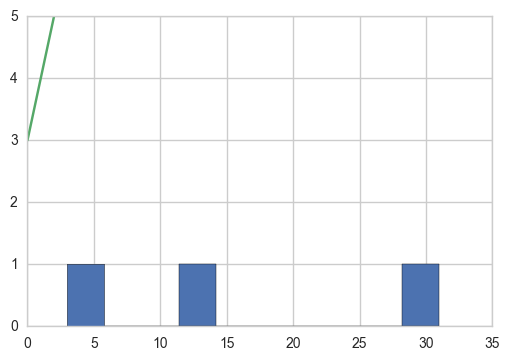

In [53]:
a = [12,3,31]
b = [3,4,5]
plt.hist(a)
plt.plot(b)

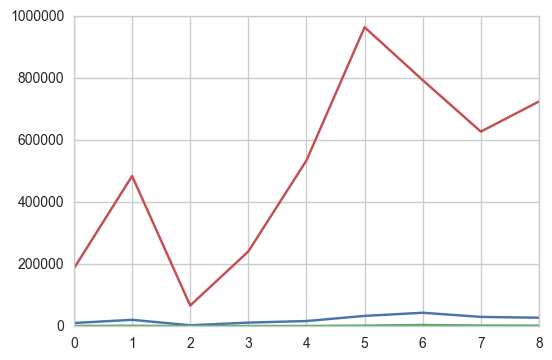

In [54]:
a = []
b = []
c = []
for index,row in sat_d_t.iterrows():
    a.append(row['psum'])
    b.append(row['psuf'])
    c.append(row['pvtm'])
plt.plot(a)
plt.plot(b)
plt.plot(c)